<p align="center">
  <a href="url"><img src="https://images.unsplash.com/photo-1635151926699-f3d5174b0049?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1169&q=80" align="middle" height="383" width="640" ></a>
</p>

# Liminal Spaces Image Classifier

#### *With help of Binh Phan*

In this tutorial, you will train a fully-connected neural network to perform image classification on liminal and not liminal spaces. We will be using TensorFlow/Keras to build our neural network and training/validation dataset. First, let's download the training and validation data:

### Building the Image Dataset

The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [2]:
!gdown https://drive.google.com/uc?id=1eJFzygFK9b1ftr9XAbEDVF7t4VY5yiMs \
    -O /content/liminal.zip

Downloading...
From: https://drive.google.com/uc?id=1eJFzygFK9b1ftr9XAbEDVF7t4VY5yiMs
To: /content/liminal.zip
100% 69.6M/69.6M [00:00<00:00, 191MB/s]


In [3]:
!gdown https://drive.google.com/uc?id=1VmlNNgglJcC-QeuyF2nmJkyCbJ-bGKe8 \
    -O /content/not_liminal.zip

Downloading...
From: https://drive.google.com/uc?id=1VmlNNgglJcC-QeuyF2nmJkyCbJ-bGKe8
To: /content/not_liminal.zip
100% 4.00M/4.00M [00:00<00:00, 128MB/s]


In [4]:
import os
import zipfile

path = "/content/train"
if not os.path.exists(path):
    os.makedirs(path)

local_zip = '/content/liminal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(path)

local_zip = '/content/not_liminal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(path)

# local_zip = '/tmp/train.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
import os
from pathlib import Path
i=0
for filename in os.listdir("/content/train/photos"):
    path1=os.path.join('/content/train/photos', filename)
    file_name = 'liminal_{}.jpg'.format(i)
    i+=1
    file_path = '/content/train' + "/" + file_name
    Path(path1).rename(file_path)

In [6]:
os.rmdir("/content/train/photos")

In [7]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = '/content/dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['liminal/', 'not_liminal/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/content/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('liminal'):
		dst = dataset_home + dst_dir + 'liminal/'  + file
		copyfile(src, dst)
	elif file.startswith('not_liminal'):
		dst = dataset_home + dst_dir + 'not_liminal/'  + file
		copyfile(src, dst)

The contents of the .zip are extracted to the directory `/tmp/train`, which in turn each contain `dandelion` and `grass` subdirectories.

What you'll see later on is that we will use the [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to automatically create our dataset from this train directory, using the subdirectories for classes.

Let's define each of these subdirectories:

In [8]:
# Directory with our training liminal pictures
train_liminal_dir = os.path.join('/content/dataset/train/liminal')

# Directory with our training not liminal pictures
train_notliminal_dir = os.path.join('/content/dataset/train/not_liminal')

# Directory with our validation liminal pictures
valid_liminal_dir = os.path.join('/content/dataset/test/liminal')

# Directory with our validation not liminal pictures
valid_notliminal_dir = os.path.join('/content/dataset/test/not_liminal')

Now, let's see what the filenames look like in the `liminal` and `not_liminal` training directories:

In [9]:
train_liminal_names = os.listdir(train_liminal_dir)
print(train_liminal_names[:10])

train_notliminal_names = os.listdir(train_notliminal_dir)
print(train_notliminal_names[:10])

validation_liminal_hames = os.listdir(valid_liminal_dir)
print(validation_liminal_hames[:10])

validation_notliminal_names = os.listdir(valid_notliminal_dir)
print(validation_notliminal_names[:10])

['liminal_494.jpg', 'liminal_542.jpg', 'liminal_511.jpg', 'liminal_361.jpg', 'liminal_103.jpg', 'liminal_378.jpg', 'liminal_535.jpg', 'liminal_87.jpg', 'liminal_419.jpg', 'liminal_23.jpg']
['not_liminal_487.jpg', 'not_liminal_271.jpg', 'not_liminal_343.jpg', 'not_liminal_51.jpg', 'not_liminal_241.jpg', 'not_liminal_20.jpg', 'not_liminal_110.jpg', 'not_liminal_498.jpg', 'not_liminal_96.jpg', 'not_liminal_139.jpg']
['liminal_325.jpg', 'liminal_94.jpg', 'liminal_179.jpg', 'liminal_291.jpg', 'liminal_112.jpg', 'liminal_549.jpg', 'liminal_514.jpg', 'liminal_430.jpg', 'liminal_455.jpg', 'liminal_342.jpg']
['not_liminal_240.jpg', 'not_liminal_94.jpg', 'not_liminal_17.jpg', 'not_liminal_89.jpg', 'not_liminal_302.jpg', 'not_liminal_178.jpg', 'not_liminal_341.jpg', 'not_liminal_360.jpg', 'not_liminal_149.jpg', 'not_liminal_349.jpg']


Let's find out the total number of liminal and not liminal images in the directories:

In [10]:
print('total training liminal images:', len(os.listdir(train_liminal_dir)))
print('total training not liminal images:', len(os.listdir(train_notliminal_dir)))
print('total validation liminal images:', len(os.listdir(valid_liminal_dir)))
print('total validation not liminal images:', len(os.listdir(valid_notliminal_dir)))

total training liminal images: 423
total training not liminal images: 434
total validation liminal images: 133
total validation not liminal images: 122


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 liminal and 8 not liminal pictures. You can rerun the cell to see a fresh batch each time:

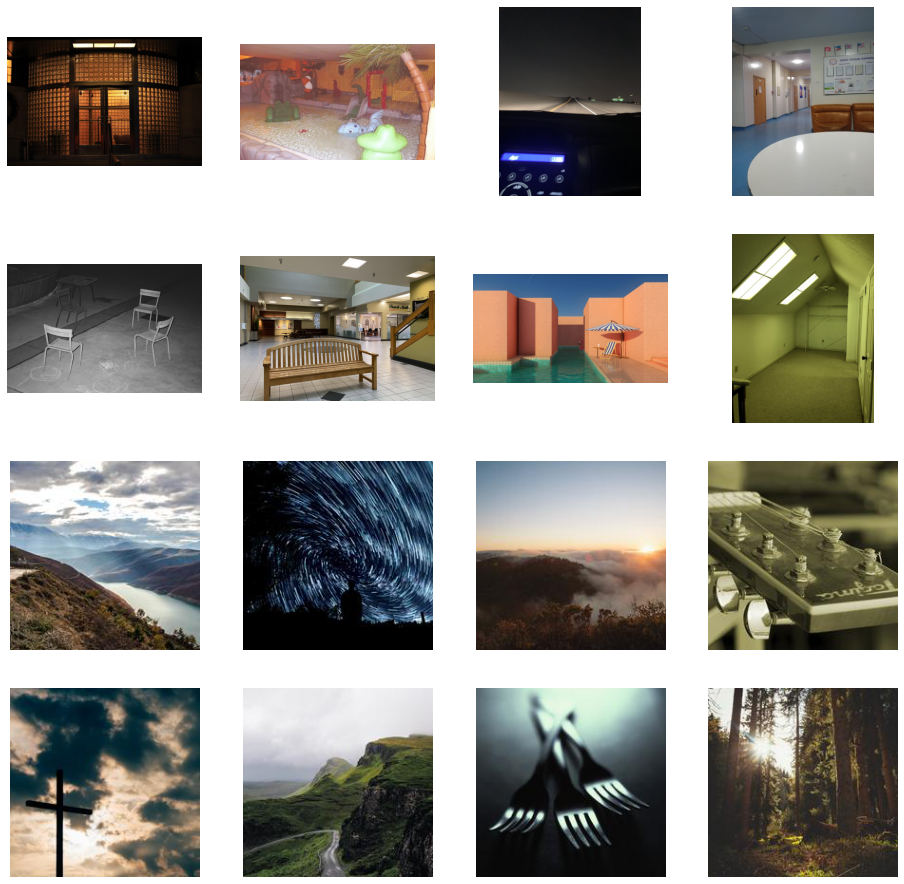

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_liminal_pic = [os.path.join(train_liminal_dir, fname) 
                for fname in train_liminal_names[pic_index-8:pic_index]]
next_notliminal_pic = [os.path.join(train_notliminal_dir, fname) 
                for fname in train_notliminal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_liminal_pic + next_notliminal_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',  # This is the source directory for training images
        classes = ['liminal', 'not_liminal'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=16,#107
        color_mode='grayscale',
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/dataset/test',  # This is the source directory for training images
        classes = ['liminal', 'not_liminal'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=16,#31
        color_mode='grayscale',
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 857 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


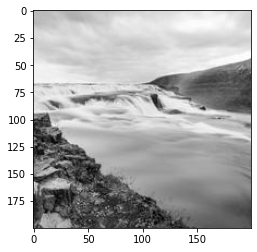

In [13]:
p = train_generator.next() #.image_shape
plt.imshow(p[0][0][:,:,0], cmap='gray')
plt.show()
# print(p)
# print(validation_generator.classes)

## Building the Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [14]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Let's then add a Flatten layer that flattens the input image, which then feeds into the next layer, a Dense layer, or fully-connected layer, with 128 hidden units. Finally, because our goal is to perform binary classification, our final layer will be a sigmoid, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1 (class 1 being not liminal and class 0 being liminal).

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 2D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

The model.summary() method call prints a summary of the NN 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 activation (Activation)     (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 97, 97, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                    

The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 53 * 16 = 848, just under our total of 857 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [18]:
history = model.fit(train_generator,
      steps_per_epoch=857//16,#8  
      epochs=15,#15
      verbose=1,
      validation_data = validation_generator,
      validation_steps=255//16) #8

Epoch 1/15
53/53 [==============================] - 51s 943ms/step - loss: 0.7166 - accuracy: 0.5470 - val_loss: 0.6551 - val_accuracy: 0.6208
Epoch 2/15
53/53 [==============================] - 50s 950ms/step - loss: 0.6096 - accuracy: 0.6813 - val_loss: 0.5996 - val_accuracy: 0.6292
Epoch 3/15
53/53 [==============================] - 49s 920ms/step - loss: 0.5166 - accuracy: 0.7396 - val_loss: 0.5337 - val_accuracy: 0.6958
Epoch 4/15
53/53 [==============================] - 49s 918ms/step - loss: 0.4822 - accuracy: 0.7551 - val_loss: 0.4959 - val_accuracy: 0.7625
Epoch 5/15
53/53 [==============================] - 48s 909ms/step - loss: 0.4371 - accuracy: 0.8026 - val_loss: 0.4499 - val_accuracy: 0.8167
Epoch 6/15
53/53 [==============================] - 49s 918ms/step - loss: 0.3304 - accuracy: 0.8573 - val_loss: 0.4441 - val_accuracy: 0.8125
Epoch 7/15
53/53 [==============================] - 49s 921ms/step - loss: 0.2360 - accuracy: 0.9037 - val_loss: 0.5176 - val_accuracy: 0.7708

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:

In [19]:
model.evaluate(validation_generator)

16/16 [==============================] - 6s 334ms/step - loss: 0.8053 - accuracy: 0.8000


[0.8052535653114319, 0.800000011920929]

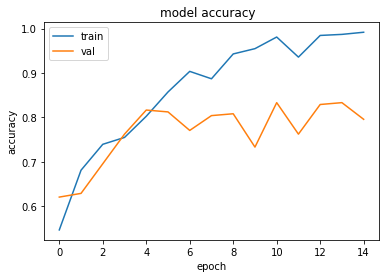

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'] )
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy  ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [21]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

16/16 [==============================] - 6s 339ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [22]:
fpr, tpr, _ = roc_curve(validation_generator.classes, np.array([np.round(pred) for pred in preds]))

In [23]:
roc_auc = auc(fpr, tpr)

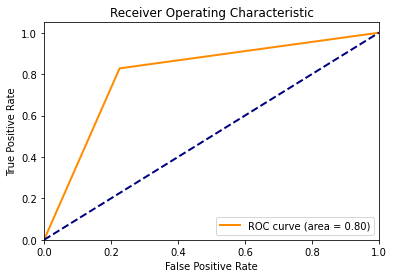

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between liminal and not liminal. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, liminal and not liminal. The higher the AUC, the better our model is at classification. 

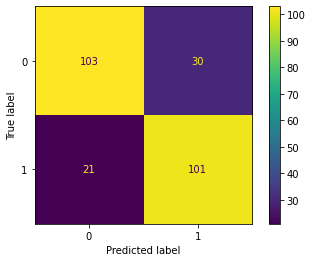

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(validation_generator.classes,np.array([np.round(pred) for pred in preds]))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Making Predictions

Now, let's use the model to make predictions! Upload an image to see if it's a liminal or not liminal space.

Saving lim2.jpg to lim2.jpg
[0.]
lim2.jpg is liminal


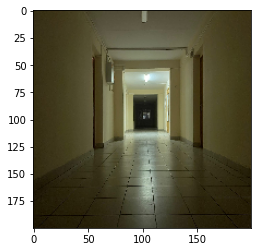

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  img = image.load_img(path, target_size=(200, 200), color_mode="grayscale") 
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is liminal")
  else:
    print(fn + " is not liminal")
 

## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)